# Project: Optimal Management of an Investment Portfolio


## Disclaimer: The datasets are dummy and not real stock prices.

#### The objective is to determine the optimal allocation of capital between different stocks in order to maximize portfolio returns while controlling risk. 
#### Historical market data (stock prices) are used to estimate the variance and covariance of returns.


## Objective and Constraints
#### The classic Markowitz model is generally formulated in two distinct ways:

### Exploration 1: Maximizing return under a risk constraint

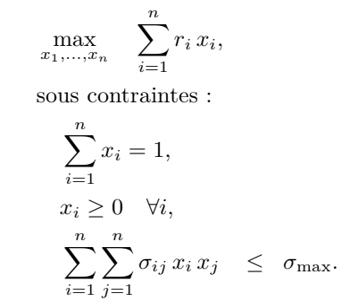

In [7]:
from IPython.display import display
import pandas as pd 
from PIL import Image
import kagglehub
import numpy as np
import warnings
warnings.simplefilter("ignore")

display((Image.open("exploration_1.png").convert("RGB")).resize((350, 300))) 

### Exploration 2: Yield-Risk Trade-off formulation (single-objective)

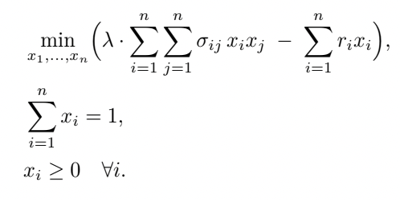

In [3]:
display((Image.open("exploration_2.png").convert("RGB")).resize((400, 200))) 

##### This model directly combines return and variance into a single objective function, with a parameter λ > 0 controlling risk aversion. The larger λ is, the more variance minimization outweighs return maximization.

## We install the data set from kaggle. 
(Beware, these are dummy data.)

In [5]:
# Download latest version
path = kagglehub.dataset_download("camnugent/sandp500")

print("Path to dataset files:", path)

Path to dataset files: /Users/alexandro/.cache/kagglehub/datasets/camnugent/sandp500/versions/4


In [6]:

apple=pd.read_csv('individual_stocks_5yr/AAPL_Data.csv')
nvidia=pd.read_csv('individual_stocks_5yr/NVDA_Data.csv')
microsoft=pd.read_csv('individual_stocks_5yr/MSFT_Data.csv')
amazon=pd.read_csv('individual_stocks_5yr/AMZN_Data.csv')
alphabet=pd.read_csv('individual_stocks_5yr/GOOGL_Data.csv')
texas_inst=pd.read_csv('individual_stocks_5yr/TXN_Data.csv')
johnson_johnson=pd.read_csv('individual_stocks_5yr/JNJ_Data.csv')
meta=pd.read_csv('individual_stocks_5yr/FB_Data.csv')


#### We're going to create a data set that will retrieve only the “close prices” of each selected stock.

In [13]:
stock={
    "apple" : apple , 
    "nvidia" : nvidia , 
    "microsoft" : microsoft , 
    "amazon" : amazon , 
    "alphabet" : alphabet , 
    "texas_inst" : texas_inst , 
    "johnson_johnson" : johnson_johnson , 
    "meta" : meta 
}    

for name, data in stock.items() : 
    data['date']=pd.to_datetime(data["date"])
    data.set_index("date", inplace=True)

df=pd.DataFrame(stock['apple']['close'])
df.columns=['apple']

for name, data in stock.items() :
    df[f'{name}']=stock[f'{name}']['close']

In [14]:
df.head()

,apple,nvidia,microsoft,amazon,alphabet,texas_inst,johnson_johnson,meta
date,,,,,,,,
2013-02-08,67.8542,12.37,27.55,261.95,393.0777,34.28,75.48,28.5450
2013-02-11,68.5614,12.51,27.86,257.21,391.6012,33.69,75.41,28.2600
2013-02-12,66.8428,12.43,27.88,258.70,390.7403,33.56,75.80,27.3700
2013-02-13,66.7156,12.37,28.03,269.47,391.8214,33.72,75.66,27.9075
2013-02-14,66.6556,12.73,28.04,269.24,394.3039,33.79,75.81,28.5000


## Preliminary metrics : 

-  daily return 

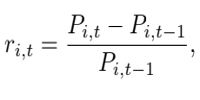

In [29]:
display((Image.open("daily_return.png").convert("RGB")).resize((200, 100))) 

In [15]:
def rendement_quotidient (data) :
    net_return=[0]
    
    for i in range(1,data.shape[0]) : 
        t_0 = data[i-1]
        t_1=data[i]
        res= (t_1 - t_0)/t_0
        net_return.append(round(res,4))
        
    return net_return

In [16]:
for name in stock.keys() :
    tmp=rendement_quotidient(df[f'{name}'])
    df[f'{name}_return']=tmp

In [17]:
df.head(5)   

,apple,nvidia,microsoft,amazon,alphabet,texas_inst,johnson_johnson,meta,apple_return,nvidia_return,microsoft_return,amazon_return,alphabet_return,texas_inst_return,johnson_johnson_return,meta_return
date,,,,,,,,,,,,,,,,
2013-02-08,67.8542,12.37,27.55,261.95,393.0777,34.28,75.48,28.5450,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2013-02-11,68.5614,12.51,27.86,257.21,391.6012,33.69,75.41,28.2600,0.0104,0.0113,0.0113,-0.0181,-0.0038,-0.0172,-0.0009,-0.0100
2013-02-12,66.8428,12.43,27.88,258.70,390.7403,33.56,75.80,27.3700,-0.0251,-0.0064,0.0007,0.0058,-0.0022,-0.0039,0.0052,-0.0315
2013-02-13,66.7156,12.37,28.03,269.47,391.8214,33.72,75.66,27.9075,-0.0019,-0.0048,0.0054,0.0416,0.0028,0.0048,-0.0018,0.0196
2013-02-14,66.6556,12.73,28.04,269.24,394.3039,33.79,75.81,28.5000,-0.0009,0.0291,0.0004,-0.0009,0.0063,0.0021,0.0020,0.0212


-  average return 

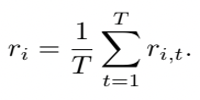

In [30]:
display((Image.open("mean_return.png").convert("RGB")).resize((200, 100))) 

In [18]:
def mean_return (data, dict) :
    
    column=data.columns[int(len(df.columns)/2):]
    for title in column : 
        dict[f'{title}_mean'] = data[f'{title}'][1:].mean()
    return None

In [19]:
mean_return_stock={}
mean_return(df, mean_return_stock)

In [20]:
return_matrix=np.array(df[df.columns[int(len(df.columns)/2):]])

-  volatility of each asset (Volatility expressed by the stock covariance matrix)

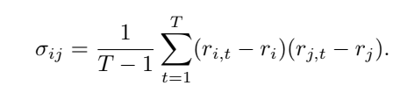

In [31]:
display((Image.open("volatillity.png").convert("RGB")).resize((400, 100))) 

In [21]:
cov_stock = (1/(df.shape[0]-1)) * (return_matrix.T @ return_matrix)

In [22]:
objective_function=[]
for name, data in mean_return_stock.items():
    objective_function.append(data)

objective_function= np.array(objective_function).reshape(len(objective_function),)
objective_function

array([0.00078569, 0.00256359, 0.00103831, 0.00150771, 0.00087917,
       0.00095914, 0.00048045, 0.00166169])

## Exploration 1

### Approach 1: simplex method with linearization of the quadratic risk constraint

In [23]:
max_risk=0.001
nb_action= objective_function.shape[0]
A_eq = np.ones((1, nb_action))
b_eq = np.array([1])

weight = np.random.rand(nb_action) # initialisation de poids aléatoire
weight /= np.sum(weight)
learning_rate = 0.1 

# Descente de gradient stochastique bruitée artificiellement pour approximer la contrainte quadratique
for _ in range(100):
    grad = 2 * cov_stock @ weight  # Gradient de la contrainte quadratique
    stochastic_update = np.random.randn(nb_action) * 0.01 
    
    if weight.T @ cov_stock @ weight > max_risk:
        weight -= learning_rate * (grad + stochastic_update)  # Mise à jour du gradient
        weight = np.maximum(weight, 0)  # Assurer que x reste positif
        weight /= np.sum(weight) 

A_ub = np.array(2*cov_stock @ weight).reshape(1, -1)    # Approximation linéaire
b_ub = np.array(max_risk)
    
bounds = [(0, 1) for _ in range(nb_action)]

In [24]:
from scipy.optimize import linprog

result = linprog (-objective_function , A_eq=A_eq ,b_eq=b_eq, A_ub=A_ub ,b_ub =b_ub , bounds=bounds, method ='simplex')
print(f"Solution:apple={result.x[0]},Nvidia={result.x[1]},microsoft={result.x[2]}, amazon={result.x[3]}, alphabet={result.x[4]}", 
      f"texas_inst={result.x[5]}, johnson_johnson={result.x[6]}, meta={result.x[7]}")
print(f"Valeur optimale={-result.fun}") 

Solution:apple=0.0,Nvidia=1.0,microsoft=0.0, amazon=0.0, alphabet=0.0 texas_inst=0.0, johnson_johnson=0.0, meta=0.0
Valeur optimale=0.002563593004769475


#### We can see that every constraint has been respected in terms of both allocation and risk, but it's not the most optimal because it's not at all diversified.


### Approach 2: Direct quadratic stress processing with CVSPY 

In [25]:
import cvxpy as cp
import numpy as np

def final_return (poids, mean_return) : # calcul du retour sur investissement final par combinaison linéaire 
    return poids.T @ mean_return 

def final_risk (poids, sigma) :  # calcul du risque final par combinaison linéaire avec la variance associé
    return poids.T @ sigma @ poids


In [26]:
def _linear_return_(nb_action, avg_return,sigma, max_risk=0.05 ) :
    x = cp.Variable(nb_action)

    objective = cp.Maximize(avg_return.T @ x)

    constraints = [
        cp.sum(x) == 1,  # Somme des poids = 1
        x >= 0,  # Pas de ventes à découvert
        cp.quad_form(x, sigma) <= max_risk  # Contrainte de variance maximale
    ]

    resultat = cp.Problem(objective, constraints)
    resultat.solve()

    return x, resultat

max_risk=0.0005
best_allocation,optimum=_linear_return_(8, objective_function, cov_stock, max_risk=max_risk)

print("Allocation optimale :", best_allocation.value)
print("Rendement maximal :", optimum.value)
print("Risque final du portefeuille :", final_risk(best_allocation.value, cov_stock))
print(f"Risque maximal autorisé : {max_risk}")

Allocation optimale : [5.49888368e-07 9.92594582e-01 7.10899810e-07 1.26318223e-06
 6.05242814e-07 5.92679573e-07 4.59825013e-07 7.40123633e-03]
Rendement maximal : 0.0025569114480341187
Risque final du portefeuille : 0.0004999993536274254
Risque maximal autorisé : 0.0005


## Exploration 2: Risk-return trade-off formulation (single-objective)

#### We recognize the Lagrangian method

In [358]:
import numpy as np

In [395]:
def model_quandratique_(avg_return, nb_action, sigma, lambda_ = 1, learning_rate=0.05, seed=42) :
    np.random.seed(seed)
    random_weight = np.random.rand(nb_action)
    random_weight /= np.sum(random_weight)

    for _ in range(200):
        grad = 2 * lambda_ * sigma @ random_weight - avg_return  # Gradient de f(x)

        # Mise à jour des poids
        random_weight -= learning_rate * grad

        # On fait en sorte que x >= 0 et sum(x) = 1
        random_weight = np.maximum(random_weight, 0) 
        random_weight /= np.sum(random_weight) 

    return random_weight

best_weight=model_quandratique_(objective_function, 8, cov_stock)

print(f'best allocation is : apple: {best_weight[0]},  nvidia : {best_weight[1]},  microsoft :{best_weight[2]},  amazon{best_weight[3]}',      
      f' alphabet : {best_weight[4]},  texas_inst :{best_weight[5]}, johnson & johnson{best_weight[6]},  meta : {best_weight[7]}')

print(f'Portfolio expected risk : { final_risk(best_weight,cov_stock)}') # formule de risque donné dans l'exercice

print(f'total return : {final_return(best_weight,objective_function )}')


best allocation is : apple: 0.09942080290816842,  nvidia : 0.24520846983282626,  microsoft :0.18063629297736644,  amazon0.1529695220169265  alphabet : 0.04313470517964239,  texas_inst :0.044013215404547855, johnson & johnson0.017465869065364667,  meta : 0.21715112261515754
Portfolio expected risk : 0.00015766926110541966
total return : 0.0016335985495215125


#### Gradient descent provides better portfolio diversification and controlled risk

## Potential variants

#### Portfolio with short sales:
##### If regulations allow, we can authorize positions xi < 0 for certain stocks (short sales). The previous models remain valid as long as the constraint xi ≥ 0 is removed. However, this may increase overall risk.

In [412]:
def model_quandratique_leverage (avg_return, nb_action, sigma, lambda_ = 0.2, learning_rate=0.01, seed=42) :
    np.random.seed(seed)
    random_weight = np.random.rand(nb_action)
    random_weight /= np.sum(random_weight)

    for _ in range(200):
        grad = 2 * lambda_ * sigma @ random_weight - avg_return  # Gradient de f(x)

        # Mise à jour des poids
        random_weight -= learning_rate * grad

        # On fait en sorte que sum(x) = 1
        random_weight /= np.sum(random_weight) 

    return random_weight


best_weight=model_quandratique_(objective_function, 8, cov_stock)

print(f'best allocation is : apple: {best_weight[0]},  nvidia : {best_weight[1]},  microsoft :{best_weight[2]},  amazon{best_weight[3]}',      
      f' alphabet : {best_weight[4]},  texas_inst :{best_weight[5]}, johnson & johnson{best_weight[6]},  meta : {best_weight[7]}')

print(f'Portfolio expected risk : { final_risk(best_weight,cov_stock)}')

print(f'total return : {final_return(best_weight,objective_function )}')

best allocation is : apple: 0.09942080290816842,  nvidia : 0.24520846983282626,  microsoft :0.18063629297736644,  amazon0.1529695220169265  alphabet : 0.04313470517964239,  texas_inst :0.044013215404547855, johnson & johnson0.017465869065364667,  meta : 0.21715112261515754
Portfolio expected risk : 0.00015766926110541966
total return : 0.0016335985495215125


#### Individual limits : 
##### We can impose xi ≤ αi for each stock to prevent a single stock from occupying too large a share of the portfolio. In this case, the constraint becomes 0 ≤ xi ≤ αi, and sum(xi) = 1.

In [467]:
def model_quandratique_diversity(avg_return, nb_action, sigma, alpha=0.5, lambda_ = 0.7, learning_rate=0.01, seed=None) :
    if seed!=None : 
        np.random.seed(seed)
    random_weight = np.random.rand(nb_action)
    random_weight /= np.sum(random_weight)

    for _ in range(200):
        grad = 2 * lambda_ * sigma @ random_weight - avg_return  # Gradient de f(x)

        # Mise à jour des poids
        random_weight -= learning_rate * grad

        # On fait en sorte que x >= 0 et sum(x) = 1
        random_weight = np.maximum(random_weight, 0) 
        random_weight = np.minimum(random_weight, alpha) 
        random_weight /= np.sum(random_weight) 

    return random_weight


best_weight=model_quandratique_(objective_function, 8, cov_stock)

print(f'best allocation is : apple: {best_weight[0]},  nvidia : {best_weight[1]},  microsoft :{best_weight[2]},  amazon{best_weight[3]}',      
      f' alphabet : {best_weight[4]},  texas_inst :{best_weight[5]}, johnson & johnson{best_weight[6]},  meta : {best_weight[7]}')

print(f'Portfolio expected risk : { final_risk(best_weight,cov_stock)}')

print(f'total return : {final_return(best_weight,objective_function )}')

best allocation is : apple: 0.09464042495480088,  nvidia : 0.24647849283347084,  microsoft :0.18159235027543186,  amazon0.15379871597238898  alphabet : 0.04338066089975372,  texas_inst :0.0442384916965391, johnson & johnson0.017582090637604443,  meta : 0.21828877273001018
Portfolio expected risk : 0.00015372707503128234
total return : 0.001578407256804627


### The result is a well-diversified allocation 

## Sensitivity analysis

In [368]:
import matplotlib.pyplot  as plt

## 1. Efficient boundary

#### Vary λ (in the single-lens version) to plot the efficient frontier.

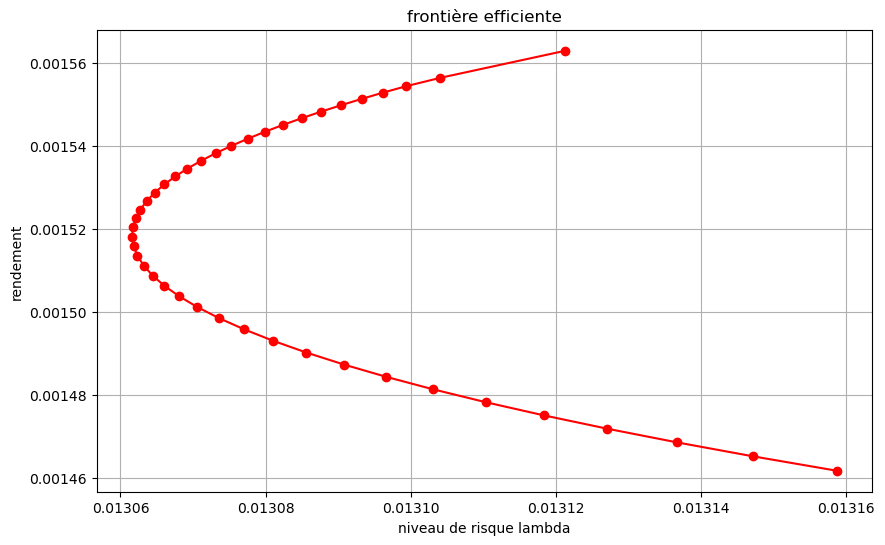

In [662]:
list_lambda=np.arange(57, 100,1)
rendement_lambda=[]
risque_lambda=[]

for ldb in list_lambda :
    res=model_quandratique_diversity(objective_function, 8, cov_stock,lambda_=ldb, learning_rate=0.135, seed=42)
    rendement_lambda.append(final_return(res, objective_function))
    risque_lambda.append(np.sqrt(final_risk(res, cov_stock)))

plt.figure(figsize=(10,6))
plt.plot(risque_lambda, rendement_lambda , marker='o', color='r')
plt.ylabel('rendement')
plt.xlabel('niveau de risque lambda')
plt.title('frontière efficiente')
plt.grid()
plt.show()

#### Interpretation: 

#### This graph shows the efficient frontier resulting from risk-constrained portfolio optimization. It shows the convex behavior typical of Markowitz models, indicating an optimal allocation of capital according to the level of risk tolerated.

#### Here, the optimal solution lies at the extremum of the curvature, as it represents the best ratio between risk and return. Depending on the risk profile chosen, this graph can also be used to estimate returns.

## 2. Pareto front 

#### Vary σmax (in the first formulation) to obtain a Pareto risk-return front.

In [551]:
import numpy as np 

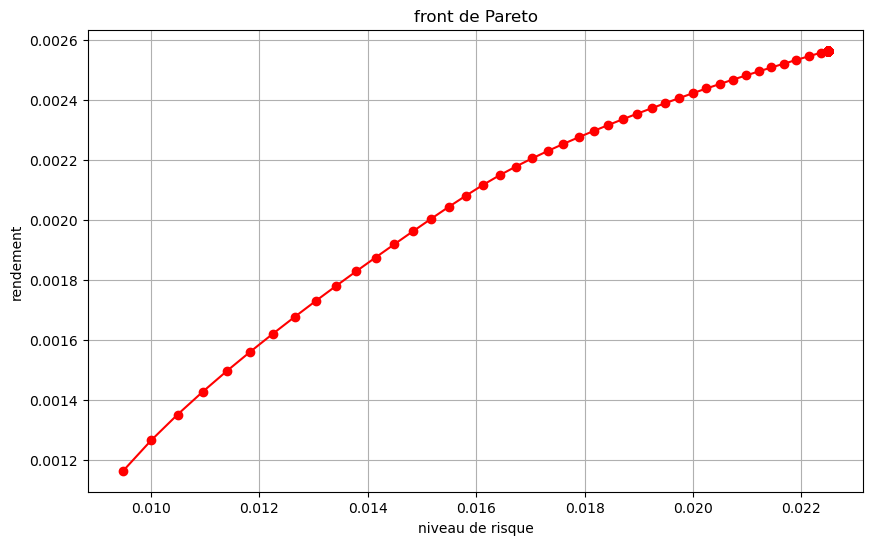

In [661]:
list_max_risk=[0.00009, 0.000095, 0.0001, 0.00015, 0.0002, 0.00025, 0.0003, 0.00035]
list_max_risk=np.arange(0.00009,0.005,0.00001)
rendement_max_risk=[]
risque_max_risk=[]

for risk in list_max_risk :
    allocation,optimum=_linear_return_(8, objective_function, cov_stock, max_risk=risk)
    rendement_max_risk.append(optimum.value)
    risque_max_risk.append(np.sqrt(final_risk(allocation.value, cov_stock)))

plt.figure(figsize=(10,6))
plt.plot(risque_max_risk, rendement_max_risk, marker='o', color='r')
plt.xlabel('niveau de risque')
plt.ylabel('rendement')
plt.title('front de Pareto')
plt.grid()
plt.show()

### Interpretation : 
#### The horizontal axis indicates the level of risk (volatility) associated with each portfolio, while the vertical axis shows the corresponding expected return.  
#### Each point on the curve corresponds to a Pareto optimal portfolio, i.e. no improvement in return is possible without an increase in risk. This representation shows the zone of maximum efficiency: any portfolio below the curve is dominated and therefore inefficient.

## Conclusion :

#### This project has enabled us to put into practice the fundamental principles of modern portfolio theory by solving a quadratic optimization problem applied to financial asset management. Using historical price data, we calculated the average returns and covariance matrix, essential for modeling the risk and return of each portfolio.

#### Two formulations of the problem were studied:

 - A risk-constrained formulation, aimed at maximizing return while limiting portfolio volatility.
 - A risk-return trade-off formulation, integrating risk directly into the objective function via a risk aversion parameter λ.

#### We implemented adapted optimization methods (linear programming, gradient descent) and integrated realistic constraints (short selling, individual limits, minimum diversification). These different variants have enabled us to construct and visualize two decision-support tools: the efficient frontier and the Pareto front, which illustrate the risk-return trade-offs for the investor.

Alexandro Bizeul